In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [4]:
sample_data = [
    ('Wireless Mouse', 25, 15.99),
    ('Mechanical Keyboard', 15, 45.50),
    ('HD Monitor', 10, 120.00),
    ('USB-C Hub', 30, 25.00),
    ('External SSD', 12, 89.99),
    ('Wireless Mouse', 10, 15.99),
    ('HD Monitor', 5, 120.00),
    ('Mechanical Keyboard', 7, 45.50)
]

In [5]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [6]:
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''

In [7]:
df = pd.read_sql_query(query, conn)

In [8]:
print("💻 Tech Product Sales Summary:\n")
print(df)

💻 Tech Product Sales Summary:

               product  total_qty  revenue
0         External SSD         24  2159.76
1           HD Monitor         30  3600.00
2  Mechanical Keyboard         44  2002.00
3            USB-C Hub         60  1500.00
4       Wireless Mouse         70  1119.30


<Figure size 1000x600 with 0 Axes>

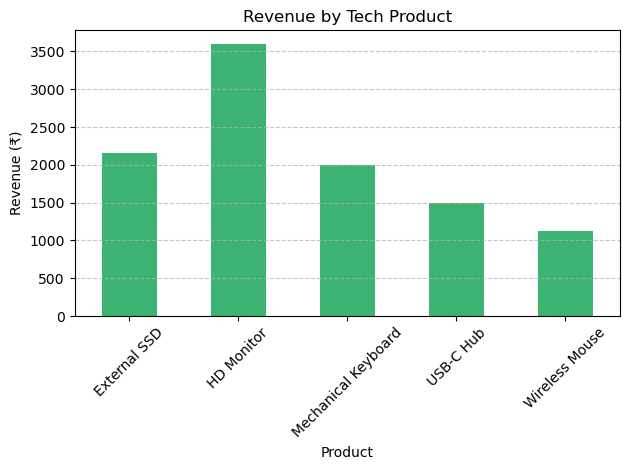

In [9]:
plt.figure(figsize=(10,6))
df.plot(kind='bar', x='product', y='revenue', color='mediumseagreen', legend=False)
plt.title('Revenue by Tech Product')
plt.xlabel('Product')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("sales_chart.png")
plt.show()

In [10]:
conn.close()